# ==============================================================
# Analisis de datos de: Riesgo de enfermedad con habitos diarios
# ==============================================================

Hábitos higiénico-dietéticos son las conductas necesarias que el paciente debe practiacar para poder lograr desarrollar una vida saludable.

Este proyecto está dirigido a:

Instituciones: Hospitales, clinicas medicas, medicos, licenciados en nutricion, personal trainers,gimnasios, profesores de educacion fisica, kinesiologos.

Equipos y tomadores de decision: medicos, staff medico, gimnasios.


Contexto Analítico:

El dataset generado para este proyecto contiene 100000 transacciones con 48 variables, incluyendo genero, edad, target(sano o no), peso, altura, etc. El dataset simula condiciones reales, con datos nulos, outliers, errores de tipeo y un balance entre el porcentaje de sanos y los que no lo estan. Este dataset será utilizado para entrenar y evaluar modelos de machine learning cuanta las variables que determinan si estan saludables o no.

Objetivos Específicos:

Exploración y limpieza de datos:

Identificar y manejar datos nulos, outliers y errores de tipeo.

Realizar un análisis exploratorio de datos (EDA) para entender las distribuciones y relaciones entre variables.

Preprocesamiento de datos:

Codificar variables categóricas.

Escalar variables numéricas.

Balancear el dataset utilizando técnicas como SMOTE o Random Undersampling.

Entrenamiento y evaluación de modelos:

Entrenar modelos como Regresión Logística, Random Forest, XGBoost y Redes Neuronales.

Evaluar los modelos utilizando métricas como precisión, recall, F1-score y AUC-ROC.

Implementación de un sistema de detección en tiempo real:

Desplegar el mejor modelo en un entorno de producción para detectar transacciones fraudulentas en tiempo real.

Optimización y mejora continua:

Monitorear el rendimiento del modelo en producción.

Ajustar hiperparámetros y retrenar el modelo con nuevos datos.

Hipótesis

Las personas que tienen menos colesterol, suelen ser mas sanas.

**Contexto Analítico:**


Objetivos Específicos:
Variable objetiva: "Target".
Exploración y limpieza de datos:

Identificar y manejar datos nulos, outliers y errores de tipeo.

Realizar un análisis exploratorio de datos (EDA) para entender las distribuciones y relaciones entre variables.

Preprocesamiento de datos:



Entrenamiento y evaluación de modelos:



Implementación de un sistema de detección en tiempo real:


Hipótesis:

Bibliografia: https://www.kaggle.com/datasets/mahdimashayekhi/disease-risk-from-daily-habits/data

Librerias necesarias para el analisis de datos

In [70]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [71]:
# Configuramos el entorno de Python en Google Colab

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Revisar si el contenido está en el drive

!ls /content/drive/MyDrive/


'06 2024 - IT SM -RECIBOS JUNIO LANDA.pdf'
 11.gslides
'2B-Carosella-Ferrario-Landa-Vales Flores-Rodriguez Gutierrez (1).gdoc'
'2B-Carosella-Ferrario-Landa-Vales Flores-Rodriguez Gutierrez.gdoc'
 4x4.jpeg
 Alcances.gdoc
'Apuntes de clase.gdoc'
'arg-hzdo-dae - 13 feb 2022.pdf'
 BE-2B-GRP5.gdoc
'BE-TP1-21B-GRP3(Normalización).gsheet'
'Colab Notebooks'
'Corneal Ectasia-traductor.gdoc'
'Covid Data.csv'
 datos2
 datos_empresas.csv
'Débora Landa CV 2021-verde.pdf'
'Débora Landa CV 2024.gdoc'
'Débora Landa CV 2025-SIN FOTO.docx'
'Definicion funcional: Borrar entrada con contenido inapropiado con el rol miembro.gdoc'
 DEMO_BACKEND.mp4
 DEMO_FRONT_WEB.mp4
'DEMO_MOBILE (1).mp4'
 DEMO_MOBILE.mp4
 DER.drawio
 DEVOPS.gslides
 df_covid_limpio.csv
'Diagrama sin título (1).drawio'
'Diagrama sin título.drawio'
'dni frente.pdf'
'Documento sin título (1).gdoc'
'Documento sin título (2).gdoc'
'Documento sin título.gdoc'
 EJ1_UNIVERSIDAD.drawio
 EJ2_HOSPITAL.drawio
 EJ3_BIBLIOTECA.drawio
'EJ_5 TRA

In [73]:
import pandas as pd

In [74]:
# Configurar el entorno de Python en Google Colab
from google.colab import drive
import os
drive.mount("/content/drive")
print(os.getcwd())
os.chdir("/content/drive/My Drive")
print(os.getcwd())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive


In [75]:
#Leer el dataset
df_health= pd.read_csv('/content/drive/MyDrive/health_lifestyle_classification.csv')

In [76]:
#Mostrar el dataset
df_health

survey_code  age  gender      height     weight        bmi  \
0                1   56    Male  173.416872  56.886640  18.915925   
1                2   69  Female  163.207380  97.799859  36.716278   
2                3   46    Male  177.281966  80.687562  25.673050   
3                4   32  Female  172.101255  63.142868  21.318480   
4                5   60  Female  163.608816  40.000000  14.943302   
...            ...  ...     ...         ...        ...        ...   
99995        99996   53    Male  177.202253  54.303671  17.293811   
99996        99997   22    Male  180.802297  40.033853  12.246712   
99997        99998   37    Male  185.540653  84.536847  24.556580   
99998        99999   72  Female  181.796786  56.923335  17.223362   
99999       100000   37    Male  175.716378  93.017286  30.125841   

       bmi_estimated  bmi_scaled  bmi_corrected  waist_size  ...  \
0          18.915925   56.747776      18.989117   72.165130  ...   
1          36.716278  110.148833      36.511417   85.598889  ...   
2          25.673050   77.019151      25.587429   90.295030  ...   
3          21.318480   63.955440      21.177109  100.504211  ...   
4          14.943302   44.829907      14.844299   69.021150  ...   
...              ...         ...            ...         ...  ...   
99995      17.293811   51.881433      17.227616   88.740028  ...   
99996      12.246712   36.740135      12.159473  103.659560  ...   
99997      24.556580   73.669741      24.172944   98.920422  ...   
99998      17.223362   51.670087      17.715475   54.559079  ...   
99999      30.125841   90.377523      30.254072   70.743851  ...   

       sunlight_exposure  meals_per_day  caffeine_intake  family_history  \
0                   High              5         Moderate              No   
1                   High              5             High             Yes   
2                   High              4         Moderate              No   
3                   High              1              NaN              No   
4                   High              1             High             Yes   
...                  ...            ...              ...             ...   
99995           Moderate              1             High              No   
99996           Moderate              5              NaN             Yes   
99997                Low              5              NaN              No   
99998                Low              4             High             Yes   
99999               High              4         Moderate             Yes   

       pet_owner  electrolyte_level gene_marker_flag  \
0            Yes                  0              1.0   
1             No                  0              1.0   
2             No                  0              1.0   
3            Yes                  0              1.0   
4            Yes                  0              1.0   
...          ...                ...              ...   
99995        Yes                  0              1.0   
99996         No                  0              1.0   
99997         No                  0              1.0   
99998        Yes                  0              1.0   
99999         No                  0              1.0   

       environmental_risk_score  daily_supplement_dosage    target  
0                           5.5                -2.275502   healthy  
1                           5.5                 6.239340   healthy  
2                           5.5                 5.423737   healthy  
3                           5.5                 8.388611   healthy  
4                           5.5                 0.332622   healthy  
...                         ...                      ...       ...  
99995                       5.5                 3.477124   healthy  
99996                       5.5                 1.609656   healthy  
99997                       5.5                -9.736463   healthy  
99998                       5.5                -4.779376   healthy  
99999           

In [77]:
# Dimensiones del dataset
df_health.shape

(100000, 48)

In [78]:
# Información general del dataset
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [79]:
# Mostrar las primeras filas
df_health.head()

survey_code  age  gender      height     weight        bmi  bmi_estimated  \
0            1   56    Male  173.416872  56.886640  18.915925      18.915925   
1            2   69  Female  163.207380  97.799859  36.716278      36.716278   
2            3   46    Male  177.281966  80.687562  25.673050      25.673050   
3            4   32  Female  172.101255  63.142868  21.318480      21.318480   
4            5   60  Female  163.608816  40.000000  14.943302      14.943302   

   bmi_scaled  bmi_corrected  waist_size  ...  sunlight_exposure  \
0   56.747776      18.989117   72.165130  ...               High   
1  110.148833      36.511417   85.598889  ...               High   
2   77.019151      25.587429   90.295030  ...               High   
3   63.955440      21.177109  100.504211  ...               High   
4   44.829907      14.844299   69.021150  ...               High   

   meals_per_day  caffeine_intake  family_history  pet_owner  \
0              5         Moderate              No        Yes   
1              5             High             Yes         No   
2              4         Moderate              No         No   
3              1              NaN              No        Yes   
4              1             High             Yes        Yes   

   electrolyte_level gene_marker_flag  environmental_risk_score  \
0                  0              1.0                       5.5   
1                  0              1.0                       5.5   
2                  0              1.0                       5.5   
3                  0              1.0                       5.5   
4                  0              1.0                       5.5   

   daily_supplement_dosage   target  
0                -2.275502  healthy  
1                 6.239340  healthy  
2                 5.423737  healthy  
3                 8.388611  healthy  
4                 0.332622  healthy  

[5 rows x 48 columns]

In [80]:
# Mostrar instancias aleatoreamente
df_health.sample(7)

survey_code  age  gender      height     weight        bmi  \
95158        95159   37    Male  169.299456  74.538600  26.005793   
81865        81866   73  Female  157.700170  72.736138  29.247309   
95506        95507   78    Male  165.696396  79.004900  28.775833   
2375          2376   23    Male  172.998249  88.055481  29.422053   
62529        62530   47  Female  186.069515  42.573752  12.296782   
72629        72630   59  Female  164.463709  48.779804  18.034325   
4963          4964   43    Male  162.192407  71.496079  27.178231   

       bmi_estimated  bmi_scaled  bmi_corrected  waist_size  ...  \
95158      26.005793   78.017380      26.006917   80.593677  ...   
81865      29.247309   87.741927      29.332943   69.124627  ...   
95506      28.775833   86.327499      28.837251  106.773983  ...   
2375       29.422053   88.266160      29.518799   72.969504  ...   
62529      12.296782   36.890346      12.281728   92.399830  ...   
72629      18.034325   54.102975      18.235927   76.155607  ...   
4963       27.178231   81.534694      26.965692   85.341596  ...   

       sunlight_exposure  meals_per_day  caffeine_intake  family_history  \
95158           Moderate              5             High             Yes   
81865               High              1             High              No   
95506               High              4             High             Yes   
2375                 Low              5              NaN              No   
62529                Low              3         Moderate              No   
72629               High              1         Moderate              No   
4963                 Low              2             High             Yes   

       pet_owner  electrolyte_level gene_marker_flag  \
95158        Yes                  0              1.0   
81865         No                  0              1.0   
95506         No                  0              1.0   
2375          No                  0              1.0   
62529        Yes                  0              1.0   
72629         No                  0              1.0   
4963         Yes                  0              1.0   

       environmental_risk_score  daily_supplement_dosage    target  
95158                       5.5                -4.206827  diseased  
81865                       5.5                 1.458962   healthy  
95506                       5.5                -1.486516   healthy  
2375                        5.5                -9.107766   healthy  
62529                       5.5                 8.548242   healthy  
72629                       5.5                 3.719638  diseased  
4963                        5.5                 9.494541   healthy  

[7 rows x 48 columns]

In [81]:
# Mostrar las ultimas filas
df_health.tail()

survey_code  age  gender      height     weight        bmi  \
99995        99996   53    Male  177.202253  54.303671  17.293811   
99996        99997   22    Male  180.802297  40.033853  12.246712   
99997        99998   37    Male  185.540653  84.536847  24.556580   
99998        99999   72  Female  181.796786  56.923335  17.223362   
99999       100000   37    Male  175.716378  93.017286  30.125841   

       bmi_estimated  bmi_scaled  bmi_corrected  waist_size  ...  \
99995      17.293811   51.881433      17.227616   88.740028  ...   
99996      12.246712   36.740135      12.159473  103.659560  ...   
99997      24.556580   73.669741      24.172944   98.920422  ...   
99998      17.223362   51.670087      17.715475   54.559079  ...   
99999      30.125841   90.377523      30.254072   70.743851  ...   

       sunlight_exposure  meals_per_day  caffeine_intake  family_history  \
99995           Moderate              1             High              No   
99996           Moderate              5              NaN             Yes   
99997                Low              5              NaN              No   
99998                Low              4             High             Yes   
99999               High              4         Moderate             Yes   

       pet_owner  electrolyte_level gene_marker_flag  \
99995        Yes                  0              1.0   
99996         No                  0              1.0   
99997         No                  0              1.0   
99998        Yes                  0              1.0   
99999         No                  0              1.0   

       environmental_risk_score  daily_supplement_dosage    target  
99995                       5.5                 3.477124   healthy  
99996                       5.5                 1.609656   healthy  
99997                       5.5                -9.736463   healthy  
99998                       5.5                -4.779376   healthy  
99999                       5.5                -2.010351  diseased  

[5 rows x 48 columns]

In [82]:
df_health.columns

Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi',
       'bmi_estimated', 'bmi_scaled', 'bmi_corrected', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'target'],
      dtype='object')

**Estadisticas rapidas**

In [83]:
df_health.describe().T

count          mean           std          min  \
survey_code               100000.0  50000.500000  28867.657797     1.000000   
age                       100000.0     48.525990     17.886768    18.000000   
height                    100000.0    170.023707      9.982798   140.000000   
weight                    100000.0     70.064862     14.693667    40.000000   
bmi                       100000.0     24.493876      5.951069     9.988495   
bmi_estimated             100000.0     24.493876      5.951069     9.988495   
bmi_scaled                100000.0     73.481627     17.853206    29.965484   
bmi_corrected             100000.0     24.494140      5.954184     9.893845   
waist_size                100000.0     84.933043     12.040314    34.093185   
blood_pressure             92331.0    119.980149     15.015503    59.128168   
heart_rate                 85997.0     74.969177      9.941668    34.745092   
cholesterol               100000.0    189.966438     29.981934    58.410902   
glucose                   100000.0     99.994538     19.982828    12.434931   
insulin                    84164.0     14.988258      5.002783    -6.794483   
sleep_hours               100000.0      7.002008      1.496821     3.000000   
work_hours                100000.0      8.001331      1.994723     0.000000   
physical_activity         100000.0      3.038344      1.884475     0.000000   
daily_steps                91671.0   7012.925748   2488.989356  1000.000000   
calorie_intake            100000.0   2201.428579    400.516318   527.172360   
sugar_intake              100000.0     60.047165     19.966850   -27.882444   
water_intake              100000.0      2.006373      0.688868     0.500000   
screen_time               100000.0      6.021525      2.933835     0.000000   
stress_level              100000.0      4.991600      3.154997     0.000000   
mental_health_score       100000.0      5.004680      3.164228     0.000000   
income                     91530.0   4038.127284   1930.025678   500.000000   
meals_per_day             100000.0      2.998720      1.414786     1.000000   
electrolyte_level         100000.0      0.000000      0.000000     0.000000   
gene_marker_flag           89526.0      1.000000      0.000000     1.000000   
environmental_risk_score  100000.0      5.500000      0.000000     5.500000   
daily_supplement_dosage   100000.0      0.015726      5.764489    -9.999895   

                                   25%           50%           75%  \
survey_code               25000.750000  50000.500000  75000.250000   
age                          33.000000     48.000000     64.000000   
height                      163.306615    170.016778    176.728920   
weight                       59.856938     69.924141     80.027418   
bmi                          20.271405     24.156734     28.258696   
bmi_estimated                20.271405     24.156734     28.258696   
bmi_scaled                   60.814215     72.470201     84.776088   
bmi_corrected                20.271059     24.151699     28.247648   
waist_size                   76.795185     84.957139     93.018713   
blood_pressure              109.812060    119.951794    130.120621   
heart_rate                   68.275432     75.046211     81.685914   
cholesterol                 169.667738    190.044579    210.222005   
glucose                      86.461401     99.986834    113.508722   
insulin                      11.627114     14.983414     18.361928   
sleep_hours                   5.986781      6.998164      8.019219   
work_hours                    6.651093      8.004549      9.353669   
physical_activity             1.633799      2.971222      4.326500   
daily_steps                5320.858377   7004.285450   8702.281300   
calorie_intake             1932.278165   2200.992765   2471.218160   
sugar_intake                 46.504292     60.047905     73.476386   
water_intake                  1.532011      2.000659      2.473047   
screen_time                   3.971318 

In [84]:
df_health.describe(include=['object']).T

count unique           top   freq
gender                 100000      2          Male  50132
sleep_quality          100000      4          Good  25147
alcohol_consumption     57613      2  Occasionally  28831
smoking_level          100000      3         Light  33437
mental_health_support  100000      2            No  50104
education_level        100000      4      Bachelor  25363
job_type               100000      6         Labor  16777
occupation             100000      6        Doctor  16927
diet_type              100000      4         Vegan  25122
exercise_type           75031      3      Strength  25265
device_usage           100000      3          High  33562
healthcare_access      100000      3          Good  33428
insurance              100000      2           Yes  50121
sunlight_exposure      100000      3           Low  33468
caffeine_intake         66739      2      Moderate  33371
family_history         100000      2           Yes  50055
pet_owner              100000      2            No  50153
target                 100000      2       healthy  70097

In [85]:
# Valores unicos de las variables categoricas
df_health.select_dtypes(include=['object']).apply(pd.unique)

gender                                                      [Male, Female]
sleep_quality                                [Fair, Good, Poor, Excellent]
alcohol_consumption                         [nan, Regularly, Occasionally]
smoking_level                                   [Non-smoker, Light, Heavy]
mental_health_support                                            [No, Yes]
education_level                       [PhD, High School, Master, Bachelor]
job_type                 [Tech, Office, Labor, Unemployed, Service, Hea...
occupation               [Farmer, Engineer, Teacher, Doctor, Driver, Ar...
diet_type                              [Vegan, Vegetarian, Omnivore, Keto]
exercise_type                               [Strength, Cardio, Mixed, nan]
device_usage                                         [High, Moderate, Low]
healthcare_access                                   [Poor, Moderate, Good]
insurance                                                        [No, Yes]
sunlight_exposure                                    [High, Low, Moderate]
caffeine_intake                                      [Moderate, High, nan]
family_history                                                   [No, Yes]
pet_owner                                                        [Yes, No]
target                                                 [healthy, diseased]
dtype: object

#**Limpieza y transformación de datos**


##**Verificación de Valores Nulos**



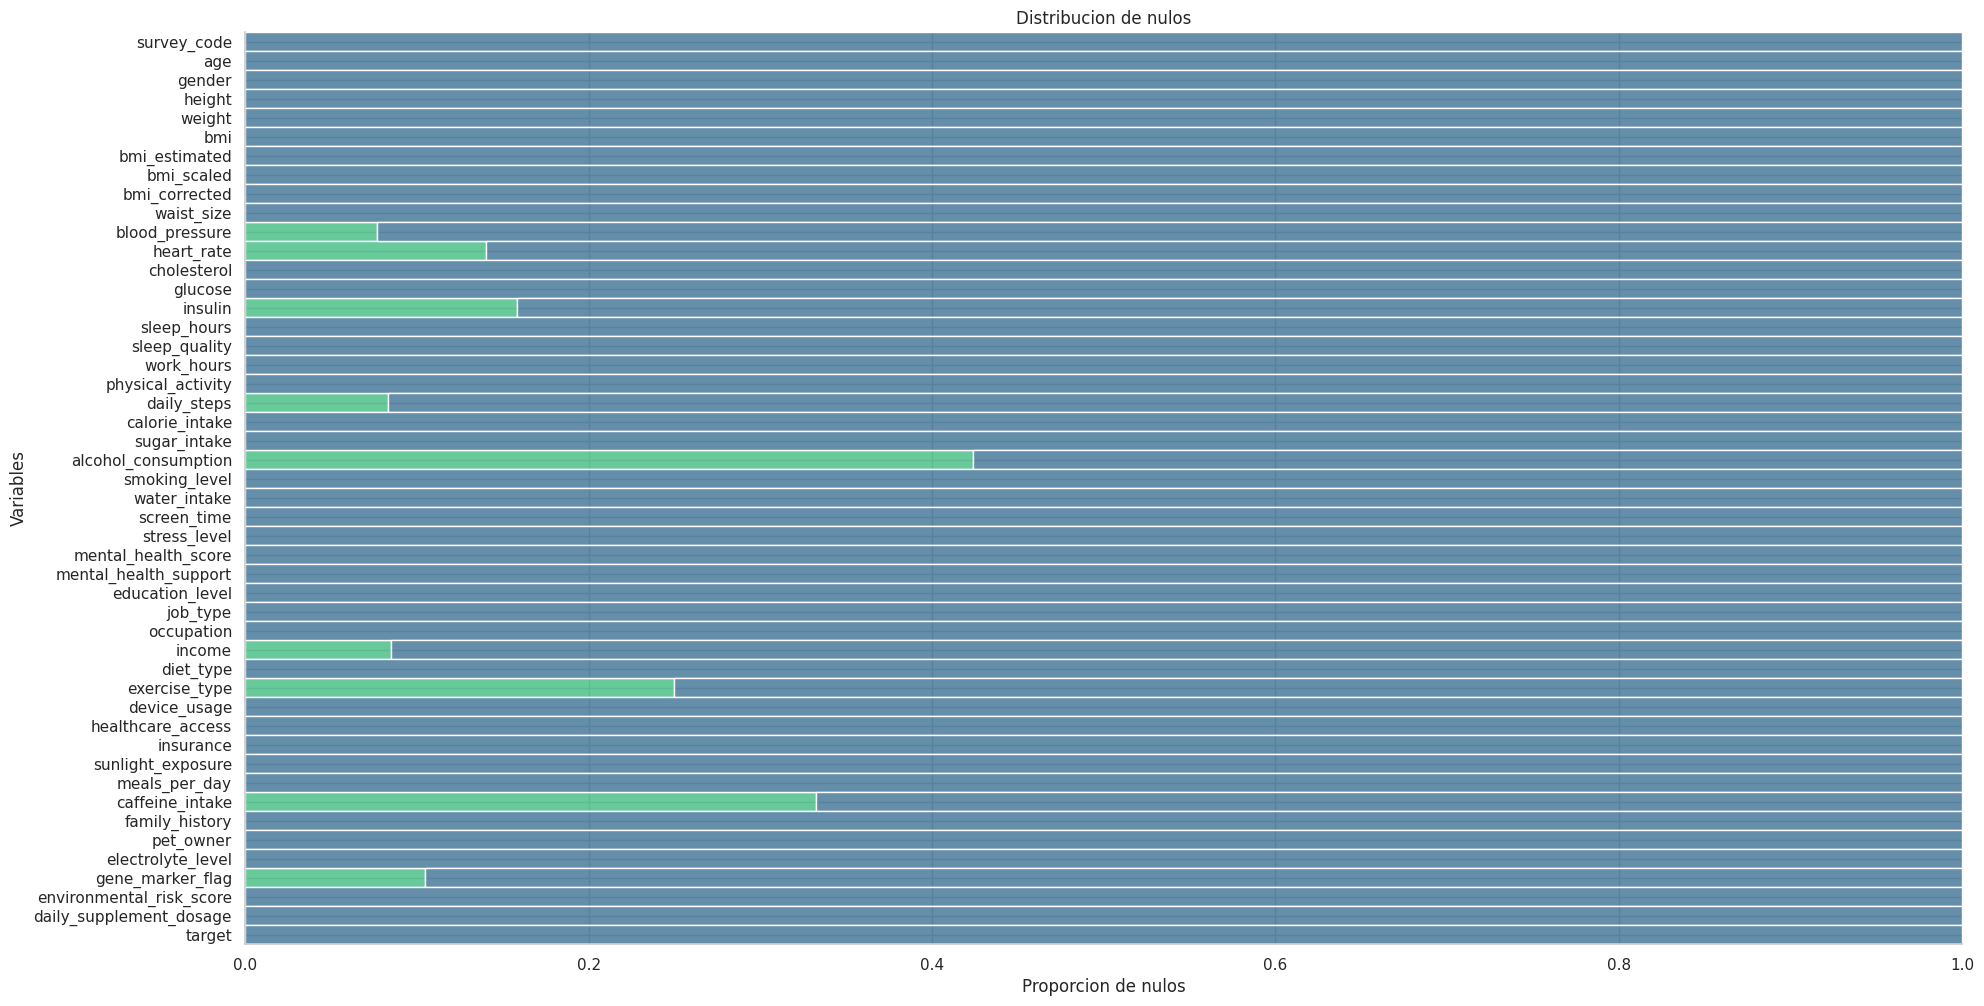

In [86]:
# Graficamos para ver la distribución de los nulos
(dfgraf:= df_health.isnull().melt()).pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2,         # Reducir el aspect ratio para que sea más ancho
            height=10,        # Ajustar la altura del gráfico
            palette='viridis',# Cambiar la paleta de colores
            legend=False       # Desactivar la leyenda para ahorrar espacio
        )
    )
)

# Añadir etiquetas
plt.title('Distribucion de nulos')
plt.xlabel('Proporcion de nulos')
plt.ylabel('Variables')
plt.show()

In [87]:
#Sumar nulos
df_health.isnull().sum()

survey_code                     0
age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure               7669
heart_rate                  14003
cholesterol                     0
glucose                         0
insulin                     15836
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  8329
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         42387
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support           0
education_level                 0
job_type                        0
occupation                      0
income                       8470
diet_type                       0
exercise_type               24969
device_usage                    0
healthcare_access               0
insurance                       0
sunlight_exposure               0
meals_per_day                   0
caffeine_intake             33261
family_history                  0
pet_owner                       0
electrolyte_level               0
gene_marker_flag            10474
environmental_risk_score        0
daily_supplement_dosage         0
target                          0
dtype: int64

In [88]:
# Resumimos todo con un contador de valores nulos por cada variable
nulos_por_variable = df_health.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum() # Sumamos los valores booleanos para obtener la cantidad de nulos por variable
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0] # Filtramos solo las variables con al menos un valor nulo
lista_variables_con_nulos = variables_con_nulos.index.tolist() # Convertimos a lista

if lista_variables_con_nulos:  # Si hay variables con nulos
    for variable in lista_variables_con_nulos:
        cantidad_nulos = cantidad_nulos_por_variable[variable]
        porcentaje_nulos = (cantidad_nulos / len(df_health)) * 100
        print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje: {porcentaje_nulos:.2f}%")
else:
    print("No hay variables con valores nulos en el DataFrame.")

Variable: blood_pressure, Cantidad de Nulos: 7669, Porcentaje: 7.67%
Variable: heart_rate, Cantidad de Nulos: 14003, Porcentaje: 14.00%
Variable: insulin, Cantidad de Nulos: 15836, Porcentaje: 15.84%
Variable: daily_steps, Cantidad de Nulos: 8329, Porcentaje: 8.33%
Variable: alcohol_consumption, Cantidad de Nulos: 42387, Porcentaje: 42.39%
Variable: income, Cantidad de Nulos: 8470, Porcentaje: 8.47%
Variable: exercise_type, Cantidad de Nulos: 24969, Porcentaje: 24.97%
Variable: caffeine_intake, Cantidad de Nulos: 33261, Porcentaje: 33.26%
Variable: gene_marker_flag, Cantidad de Nulos: 10474, Porcentaje: 10.47%


In [89]:
df_health.isnull().sum() / len(df_health) * 100

survey_code                  0.000
age                          0.000
gender                       0.000
height                       0.000
weight                       0.000
bmi                          0.000
bmi_estimated                0.000
bmi_scaled                   0.000
bmi_corrected                0.000
waist_size                   0.000
blood_pressure               7.669
heart_rate                  14.003
cholesterol                  0.000
glucose                      0.000
insulin                     15.836
sleep_hours                  0.000
sleep_quality                0.000
work_hours                   0.000
physical_activity            0.000
daily_steps                  8.329
calorie_intake               0.000
sugar_intake                 0.000
alcohol_consumption         42.387
smoking_level                0.000
water_intake                 0.000
screen_time                  0.000
stress_level                 0.000
mental_health_score          0.000
mental_health_support        0.000
education_level              0.000
job_type                     0.000
occupation                   0.000
income                       8.470
diet_type                    0.000
exercise_type               24.969
device_usage                 0.000
healthcare_access            0.000
insurance                    0.000
sunlight_exposure            0.000
meals_per_day                0.000
caffeine_intake             33.261
family_history               0.000
pet_owner                    0.000
electrolyte_level            0.000
gene_marker_flag            10.474
environmental_risk_score     0.000
daily_supplement_dosage      0.000
target                       0.000
dtype: float64

In [90]:
# --- Paso 1: Convertir columnas relevantes a tipo numérico (manejar posibles no-numéricos como NaN) ---
# Esto es crucial para asegurar que la media/mediana se calculen correctamente
numeric_cols_to_process = [
    'blood_pressure', 'heart_rate', 'insulin', 'daily_steps',
    'alcohol_consumption', 'income', 'caffeine_intake', 'gene_marker_flag'
]

for col in numeric_cols_to_process:
    df_health[col] = pd.to_numeric(df_health[col], errors='coerce')

# --- Paso 2: Imputar valores nulos según la estrategia definida ---

# Imputar con la MEDIANA (para distribuciones asimétricas/propensas a outliers)
cols_impute_median = [
    'income',
    'alcohol_consumption',
    'daily_steps',
    'caffeine_intake',
    'insulin'
]

print("--- Imputando con la MEDIANA ---")
for col in cols_impute_median:
    if df_health[col].isnull().any(): # Solo imputar si hay nulos
        median_val = df_health[col].median()
        df_health[col].fillna(median_val, inplace=True)
        print(f"Columna '{col}': Imputados {df_health[col].isnull().sum()} nulos con la mediana ({median_val:.3f}).")
    else:
        print(f"Columna '{col}': No hay nulos para imputar con la mediana.")


# Imputar con la MEDIA (para distribuciones más simétricas)
cols_impute_mean = [
    'blood_pressure',
    'heart_rate'
]

print("\n--- Imputando con la MEDIA ---")
for col in cols_impute_mean:
    if df_health[col].isnull().any(): # Solo imputar si hay nulos
        mean_val = df_health[col].mean()
        df_health[col].fillna(mean_val, inplace=True)
        print(f"Columna '{col}': Imputados {df_health[col].isnull().sum()} nulos con la media ({mean_val:.3f}).")
    else:
        print(f"Columna '{col}': No hay nulos para imputar con la media.")


# Imputar con la MODA (para variables categóricas o binarias)
# 'exercise_type' es categórica
# 'gene_marker_flag' es un flag binario, la moda es más apropiada que media/mediana
cols_impute_mode = [
    'exercise_type',
    'gene_marker_flag'
]

print("\n--- Imputando con la MODA ---")
for col in cols_impute_mode:
    if df_health[col].isnull().any(): # Solo imputar si hay nulos
        # Asegurarse de que la columna sea de tipo objeto/categoría si es categórica
        if df_health[col].dtype != 'object' and df_health[col].dtype != 'category':
            df_health[col] = df_health[col].astype(str) # Convertir a string para manejar moda de no-numericos

        mode_val = df_health[col].mode()[0] # [0] para tomar el primer valor si hay múltiples modas
        df_health[col].fillna(mode_val, inplace=True)
        print(f"Columna '{col}': Imputados {df_health[col].isnull().sum()} nulos con la moda ({mode_val}).")
    else:
        print(f"Columna '{col}': No hay nulos para imputar con la moda.")


# --- Paso 3: Verificar que no queden valores nulos ---
print("\n--- Verificación final de valores nulos ---")
print(df_health.isnull().sum()[df_health.isnull().sum() > 0])

if df_health.isnull().sum().sum() == 0:
    print("\n¡Todos los valores nulos han sido imputados exitosamente!")
else:
    print("\n¡Todavía quedan valores nulos!")

    null_values_after_imputation = df_health.isnull().sum()
print("Columnas con valores nulos restantes:")
print(null_values_after_imputation[null_values_after_imputation > 0])



--- Imputando con la MEDIANA ---
Columna 'income': Imputados 0 nulos con la mediana (4004.601).
Columna 'alcohol_consumption': Imputados 100000 nulos con la mediana (nan).
Columna 'daily_steps': Imputados 0 nulos con la mediana (7004.285).
Columna 'caffeine_intake': Imputados 100000 nulos con la mediana (nan).
Columna 'insulin': Imputados 0 nulos con la mediana (14.983).

--- Imputando con la MEDIA ---
Columna 'blood_pressure': Imputados 0 nulos con la media (119.980).
Columna 'heart_rate': Imputados 0 nulos con la media (74.969).

--- Imputando con la MODA ---
Columna 'exercise_type': Imputados 0 nulos con la moda (Strength).
Columna 'gene_marker_flag': Imputados 0 nulos con la moda (1.0).

--- Verificación final de valores nulos ---
alcohol_consumption    100000
caffeine_intake        100000
dtype: int64

¡Todavía quedan valores nulos!
Columnas con valores nulos restantes:
alcohol_consumption    100000
caffeine_intake        100000
dtype: int64


In [91]:
#--Como sigue teniendo varios valores nulos la columna de cafeina decidi borrarla
if df_health is not None:
    # --- Borrar la columna 'caffeine_intake' ---
    # axis=1 indica que queremos borrar una columna (no una fila)
    # inplace=True modifica el DataFrame directamente sin necesidad de reasignarlo
    if 'caffeine_intake' in df_health.columns:
        df_health.drop('caffeine_intake', axis=1, inplace=True)
        print("\nColumna 'caffeine_intake' borrada exitosamente.")
    else:
        print("\nLa columna 'caffeine_intake' no se encontró en el DataFrame.")


Columna 'caffeine_intake' borrada exitosamente.


In [92]:
#--Rellenar el la columna 'alcohol_consumption' con la media
 #--- Asegurarse de que la columna sea numérica ---
column_alcohol = 'alcohol_consumption'

if column_alcohol in df_health.columns:
    df_health[column_alcohol] = pd.to_numeric(df_health[column_alcohol], errors='coerce')
    print(f"Columna '{column_alcohol}' convertida a tipo numérico (NaN para errores).\n")

    # --- Imputar la columna 'alcohol_consumption' con la MEDIANA ---
    if df_health[column_alcohol].isnull().any():
        median_val = df_health[column_alcohol].median()
        df_health[column_alcohol].fillna(median_val, inplace=True)
        print(f"Columna '{column_alcohol}': Nulos imputados con la mediana ({median_val:.3f}).")
    else:
        print(f"Columna '{column_alcohol}': No hay nulos para imputar.")
# --- Verificación final de nulos solo para esta columna ---
    print(f"\nVerificación de nulos en '{column_alcohol}' después de la imputación:")
    print(df_health[column_alcohol].isnull().sum())

Columna 'alcohol_consumption' convertida a tipo numérico (NaN para errores).

Columna 'alcohol_consumption': Nulos imputados con la mediana (nan).

Verificación de nulos en 'alcohol_consumption' después de la imputación:
100000


Alto porcentaje de nulos: Con un 42.387% de valores nulos, cualquier imputación tendrá un impacto significativo. La mediana es más robusta a los valores extremos y ayuda a mantener la forma de la distribución original en mayor medida que la media cuando hay muchos datos faltantes.

In [93]:
# --- Verificar que no queden valores nulos ---
print("\n--- Verificación final de valores nulos ---")
print(df_health.isnull().sum()[df_health.isnull().sum() > 0])

if df_health.isnull().sum().sum() == 0:
    print("\n¡Todos los valores nulos han sido imputados exitosamente!")
else:
    print("\n¡Todavía quedan valores nulos!")


--- Verificación final de valores nulos ---
alcohol_consumption    100000
dtype: int64

¡Todavía quedan valores nulos!


In [94]:
#--Como sigue teniendo varios valores nulos la columna de cafeina decidi borrarla
if df_health is not None:
    # --- Borrar la columna 'caffeine_intake' ---
    # axis=1 indica que queremos borrar una columna (no una fila)
    # inplace=True modifica el DataFrame directamente sin necesidad de reasignarlo
    if 'alcohol_consumption' in df_health.columns:
        df_health.drop('alcohol_consumption', axis=1, inplace=True)
        print("\nColumna 'alcohol_consumption' borrada exitosamente.")
    else:
        print("\nLa columna 'alcohol_consumption' no se encontró en el DataFrame.")


Columna 'alcohol_consumption' borrada exitosamente.


Si bien alcohol_consumption afecta a la variable objetiva se decide retirar por tener gran cantidad de valores nulos.

In [95]:
columns_to_drop = ['electrolyte_level', 'environmental_risk_score']
df_health.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

Se eliminan electrolyte_level y environmental_risk_score por tener variables constantes.

In [96]:
#--Se verifica si sigue habiendo valores nulos
df_health.isnull().sum().sum() == 0

np.True_

In [97]:
df_health

survey_code  age  gender      height     weight        bmi  \
0                1   56    Male  173.416872  56.886640  18.915925   
1                2   69  Female  163.207380  97.799859  36.716278   
2                3   46    Male  177.281966  80.687562  25.673050   
3                4   32  Female  172.101255  63.142868  21.318480   
4                5   60  Female  163.608816  40.000000  14.943302   
...            ...  ...     ...         ...        ...        ...   
99995        99996   53    Male  177.202253  54.303671  17.293811   
99996        99997   22    Male  180.802297  40.033853  12.246712   
99997        99998   37    Male  185.540653  84.536847  24.556580   
99998        99999   72  Female  181.796786  56.923335  17.223362   
99999       100000   37    Male  175.716378  93.017286  30.125841   

       bmi_estimated  bmi_scaled  bmi_corrected  waist_size  ...  \
0          18.915925   56.747776      18.989117   72.165130  ...   
1          36.716278  110.148833      36.511417   85.598889  ...   
2          25.673050   77.019151      25.587429   90.295030  ...   
3          21.318480   63.955440      21.177109  100.504211  ...   
4          14.943302   44.829907      14.844299   69.021150  ...   
...              ...         ...            ...         ...  ...   
99995      17.293811   51.881433      17.227616   88.740028  ...   
99996      12.246712   36.740135      12.159473  103.659560  ...   
99997      24.556580   73.669741      24.172944   98.920422  ...   
99998      17.223362   51.670087      17.715475   54.559079  ...   
99999      30.125841   90.377523      30.254072   70.743851  ...   

       device_usage  healthcare_access  insurance  sunlight_exposure  \
0              High               Poor         No               High   
1          Moderate           Moderate         No               High   
2              High               Good        Yes               High   
3               Low           Moderate         No               High   
4               Low           Moderate        Yes               High   
...             ...                ...        ...                ...   
99995      Moderate               Poor         No           Moderate   
99996          High           Moderate         No           Moderate   
99997           Low               Good        Yes                Low   
99998           Low               Poor        Yes                Low   
99999           Low           Moderate         No               High   

       meals_per_day  family_history pet_owner  gene_marker_flag  \
0                  5              No       Yes               1.0   
1                  5             Yes        No               1.0   
2                  4              No        No               1.0   
3                  1              No       Yes               1.0   
4                  1             Yes       Yes               1.0   
...              ...             ...       ...               ...   
99995              1              No       Yes               1.0   
99996              5             Yes        No               1.0   
99997              5              No        No               1.0   
99998              4             Yes       Yes               1.0   
99999              4             Yes        No               1.0   

       daily_supplement_dosage    target  
0                    -2.275502   healthy  
1                     6.239340   healthy  
2                     5.423737   healthy  
3                     8.388611   healthy  
4                     0.332622   healthy  
...                        ...       ...  
99995                 3.477124   healthy  
99996                 1.609656   healthy  
99997                -9.736463   healthy  
99998                -4.779376   healthy  
99999                -2.010351  diseased  

[100000 rows x 44 columns]

#**Verificación de Valores duplicados**

In [98]:
df_health.duplicated().sum()

np.int64(0)

In [99]:
df_health.drop_duplicates(inplace=True)

In [100]:
df_health.duplicated().sum()

np.int64(0)

In [101]:
df_health

survey_code  age  gender      height     weight        bmi  \
0                1   56    Male  173.416872  56.886640  18.915925   
1                2   69  Female  163.207380  97.799859  36.716278   
2                3   46    Male  177.281966  80.687562  25.673050   
3                4   32  Female  172.101255  63.142868  21.318480   
4                5   60  Female  163.608816  40.000000  14.943302   
...            ...  ...     ...         ...        ...        ...   
99995        99996   53    Male  177.202253  54.303671  17.293811   
99996        99997   22    Male  180.802297  40.033853  12.246712   
99997        99998   37    Male  185.540653  84.536847  24.556580   
99998        99999   72  Female  181.796786  56.923335  17.223362   
99999       100000   37    Male  175.716378  93.017286  30.125841   

       bmi_estimated  bmi_scaled  bmi_corrected  waist_size  ...  \
0          18.915925   56.747776      18.989117   72.165130  ...   
1          36.716278  110.148833      36.511417   85.598889  ...   
2          25.673050   77.019151      25.587429   90.295030  ...   
3          21.318480   63.955440      21.177109  100.504211  ...   
4          14.943302   44.829907      14.844299   69.021150  ...   
...              ...         ...            ...         ...  ...   
99995      17.293811   51.881433      17.227616   88.740028  ...   
99996      12.246712   36.740135      12.159473  103.659560  ...   
99997      24.556580   73.669741      24.172944   98.920422  ...   
99998      17.223362   51.670087      17.715475   54.559079  ...   
99999      30.125841   90.377523      30.254072   70.743851  ...   

       device_usage  healthcare_access  insurance  sunlight_exposure  \
0              High               Poor         No               High   
1          Moderate           Moderate         No               High   
2              High               Good        Yes               High   
3               Low           Moderate         No               High   
4               Low           Moderate        Yes               High   
...             ...                ...        ...                ...   
99995      Moderate               Poor         No           Moderate   
99996          High           Moderate         No           Moderate   
99997           Low               Good        Yes                Low   
99998           Low               Poor        Yes                Low   
99999           Low           Moderate         No               High   

       meals_per_day  family_history pet_owner  gene_marker_flag  \
0                  5              No       Yes               1.0   
1                  5             Yes        No               1.0   
2                  4              No        No               1.0   
3                  1              No       Yes               1.0   
4                  1             Yes       Yes               1.0   
...              ...             ...       ...               ...   
99995              1              No       Yes               1.0   
99996              5             Yes        No               1.0   
99997              5              No        No               1.0   
99998              4             Yes       Yes               1.0   
99999              4             Yes        No               1.0   

       daily_supplement_dosage    target  
0                    -2.275502   healthy  
1                     6.239340   healthy  
2                     5.423737   healthy  
3                     8.388611   healthy  
4                     0.332622   healthy  
...                        ...       ...  
99995                 3.477124   healthy  
99996                 1.609656   healthy  
99997                -9.736463   healthy  
99998                -4.779376   healthy  
99999                -2.010351  diseased  

[100000 rows x 44 columns]

No hay variables duplicadas en el Dataset.

## **Tranformación (Errores de tipeo)**







Diccionario de variables:
Variables Demográficas y de Identificación
survey_code: Código de la encuesta. Un identificador único para cada participante.

age: Edad.

gender: Género.

education_level: Nivel de educación.

job_type: Tipo de trabajo.

occupation: Ocupación.

income: Ingresos.

Variables de Salud Física y Biomarcadores
height: Altura.

weight: Peso.

bmi: Índice de Masa Corporal.

bmi_estimated: IMC estimado.

bmi_scaled: IMC escalado.

bmi_corrected: IMC corregido.

waist_size: Tamaño de la cintura.

blood_pressure: Presión arterial.

heart_rate: Frecuencia cardíaca.

cholesterol: Colesterol.

glucose: Glucosa.

insulin: Insulina.

electrolyte_level: Nivel de electrolitos.

environmental_risk_score: Puntuación de riesgo ambiental.

gene_marker_flag: Indicador de marcador genético.

Variables de Estilo de Vida y Hábitos
sleep_hours: Horas de sueño.

sleep_quality: Calidad del sueño.

work_hours: Horas de trabajo.

physical_activity: Actividad física.

daily_steps: Pasos diarios.

calorie_intake: Ingesta de calorías.

sugar_intake: Ingesta de azúcar.

alcohol_consumption: Consumo de alcohol.

smoking_level: Nivel de tabaquismo.

water_intake: Consumo de agua.

screen_time: Tiempo de pantalla.

stress_level: Nivel de estrés.

mental_health_score: Puntuación de salud mental.

mental_health_support: Apoyo a la salud mental.

diet_type: Tipo de dieta.

exercise_type: Tipo de ejercicio.

device_usage: Uso de dispositivos.

healthcare_access: Acceso a atención médica.

insurance: Seguro.

sunlight_exposure: Exposición a la luz solar.

meals_per_day: Comidas por día.

caffeine_intake: Ingesta de cafeína.

family_history: Historia familiar.

pet_owner: Dueño de mascota.

daily_supplement_dosage: Dosis diaria de suplementos.

Variable Objetivo (Target)
target: Objetivo. Esta es la variable dependiente que se intenta predecir, usualmente una categoría de salud.









In [102]:
categorical_cols = df_health.select_dtypes(include=['object']).columns.tolist()

print(f"\nColumnas categóricas identificadas para codificación: {categorical_cols}")

# --- Aplicar Label Encoding a todas las columnas categóricas ---
print("\n--- Aplicando Label Encoding a todas las variables categóricas ---")
label_encoders = {}
for col in categorical_cols:
    if col in df_health.columns:
        # Asegurarse de que no haya nulos antes de codificar, si los hay, imputarlos con la moda
        if df_health[col].isnull().any():
            mode_val = df_health[col].mode()[0]
            df_health[col].fillna(mode_val, inplace=True)
            print(f"  Nulos en '{col}' imputados con la moda antes de Label Encoding.")

        le = LabelEncoder()
        df_health[col] = le.fit_transform(df_health[col])
        label_encoders[col] = le
        print(f"  Columna '{col}' codificada con Label Encoding.")
    else:
        print(f"  Advertencia: Columna '{col}' no encontrada.")

# --- Verificación Final ---
print("\n--- Verificación de Tipos de Datos y Primeras Filas ---")
print(df_health.info())
print("\nPrimeras 5 filas del DataFrame después de la codificación:")
print(df_health.head())


Columnas categóricas identificadas para codificación: ['gender', 'sleep_quality', 'smoking_level', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'diet_type', 'exercise_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'family_history', 'pet_owner', 'gene_marker_flag', 'target']

--- Aplicando Label Encoding a todas las variables categóricas ---
  Columna 'gender' codificada con Label Encoding.
  Columna 'sleep_quality' codificada con Label Encoding.
  Columna 'smoking_level' codificada con Label Encoding.
  Columna 'mental_health_support' codificada con Label Encoding.
  Columna 'education_level' codificada con Label Encoding.
  Columna 'job_type' codificada con Label Encoding.
  Columna 'occupation' codificada con Label Encoding.
  Columna 'diet_type' codificada con Label Encoding.
  Columna 'exercise_type' codificada con Label Encoding.
  Columna 'device_usage' codificada con Label Encoding.
  Columna 'healthcare_access' codificada

In [103]:
df_health

survey_code  age  gender      height     weight        bmi  \
0                1   56       1  173.416872  56.886640  18.915925   
1                2   69       0  163.207380  97.799859  36.716278   
2                3   46       1  177.281966  80.687562  25.673050   
3                4   32       0  172.101255  63.142868  21.318480   
4                5   60       0  163.608816  40.000000  14.943302   
...            ...  ...     ...         ...        ...        ...   
99995        99996   53       1  177.202253  54.303671  17.293811   
99996        99997   22       1  180.802297  40.033853  12.246712   
99997        99998   37       1  185.540653  84.536847  24.556580   
99998        99999   72       0  181.796786  56.923335  17.223362   
99999       100000   37       1  175.716378  93.017286  30.125841   

       bmi_estimated  bmi_scaled  bmi_corrected  waist_size  ...  \
0          18.915925   56.747776      18.989117   72.165130  ...   
1          36.716278  110.148833      36.511417   85.598889  ...   
2          25.673050   77.019151      25.587429   90.295030  ...   
3          21.318480   63.955440      21.177109  100.504211  ...   
4          14.943302   44.829907      14.844299   69.021150  ...   
...              ...         ...            ...         ...  ...   
99995      17.293811   51.881433      17.227616   88.740028  ...   
99996      12.246712   36.740135      12.159473  103.659560  ...   
99997      24.556580   73.669741      24.172944   98.920422  ...   
99998      17.223362   51.670087      17.715475   54.559079  ...   
99999      30.125841   90.377523      30.254072   70.743851  ...   

       device_usage  healthcare_access  insurance  sunlight_exposure  \
0                 0                  2          0                  0   
1                 2                  1          0                  0   
2                 0                  0          1                  0   
3                 1                  1          0                  0   
4                 1                  1          1                  0   
...             ...                ...        ...                ...   
99995             2                  2          0                  2   
99996             0                  1          0                  2   
99997             1                  0          1                  1   
99998             1                  2          1                  1   
99999             1                  1          0                  0   

       meals_per_day  family_history  pet_owner  gene_marker_flag  \
0                  5               0          1                 0   
1                  5               1          0                 0   
2                  4               0          0                 0   
3                  1               0          1                 0   
4                  1               1          1                 0   
...              ...             ...        ...               ...   
99995              1               0          1                 0   
99996              5               1          0                 0   
99997              5               0          0                 0   
99998              4               1          1                 0   
99999              4               1          0                 0   

       daily_supplement_dosage  target  
0                    -2.275502       1  
1                     6.239340       1  
2                     5.423737       1  
3                     8.388611       1  
4                     0.332622       1  
...                        ...     ...  
99995                 3.477124       1  
99996                 1.609656       1  
99997                -9.736463       1  
99998                -4.779376       1  
99999                -2.010351       0  

[100000 rows x 44 columns]

Con el Lebel encoder se rellenaron las variables categoricas a numericas determinando el nivel de educacion de 0 a 3 (High school -->0,a Master -->3, asi sucesivamente). No habia errores de tipeo.

## **Tratamiento de valores outliers**


In [104]:
# Columna numérica a analizar
columna_numerica = [ 'age'
]

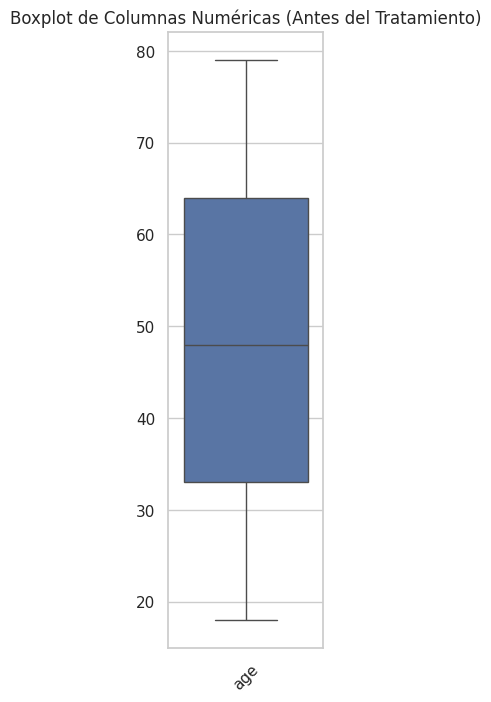

In [105]:
# Visualización de outliers antes del tratamiento
plt.figure(figsize=(2, 8))
sns.boxplot(data=df_health[columna_numerica])
plt.title("Boxplot de Columnas Numéricas (Antes del Tratamiento)")
plt.xticks(rotation=45)
plt.show()

In [106]:
# Función para identificar outliers usando IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = columna[(columna < limite_inferior) | (columna > limite_superior)]
    return outliers

# Identificar outliers en cada columna numérica
for columna in columna_numerica:
    outliers = detectar_outliers(df_health[columna])
    print(f"Número de outliers segun IQR en '{columna}': {len(outliers)}")
    print(f"Outliers en '{columna}': {outliers.values}\n")

Número de outliers segun IQR en 'age': 0
Outliers en 'age': []



Se analizo la variable 'age' para ver si tenia outliers pero el Dataset no posee.

# **Análisis Exploratorio de datos**


Analisis univariado


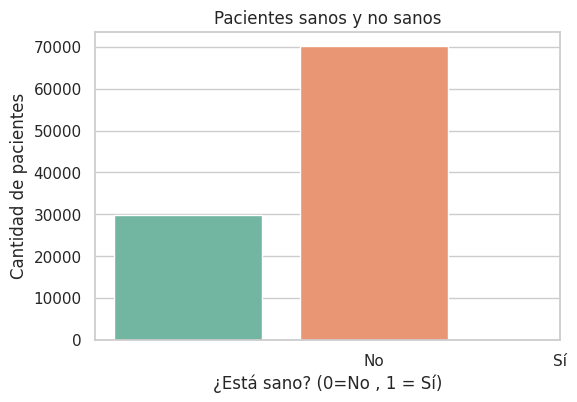

In [107]:
# Confirmamos que target esté en formato entero
df_health['target'] = df_health['target'].astype(int)

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_health, palette='Set2')

plt.title("Pacientes sanos y no sanos")
plt.xlabel("¿Está sano? (0=No , 1 = Sí)")
plt.ylabel("Cantidad de pacientes")
plt.xticks([1, 2], ['No', 'Sí'])
plt.show()


Bivariado

Bivariado

In [108]:
import statsmodels.api as sm

# Definir las variables independientes y dependientes
X = df_health['age']
y = df_health['target']

# Agregar una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Ver el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.832
Date:                Tue, 05 Aug 2025   Prob (F-statistic):             0.0279
Time:                        20:45:00   Log-Likelihood:                -63766.
No. Observations:              100000   AIC:                         1.275e+05
Df Residuals:                   99998   BIC:                         1.276e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7096      0.004    169.514      0.0

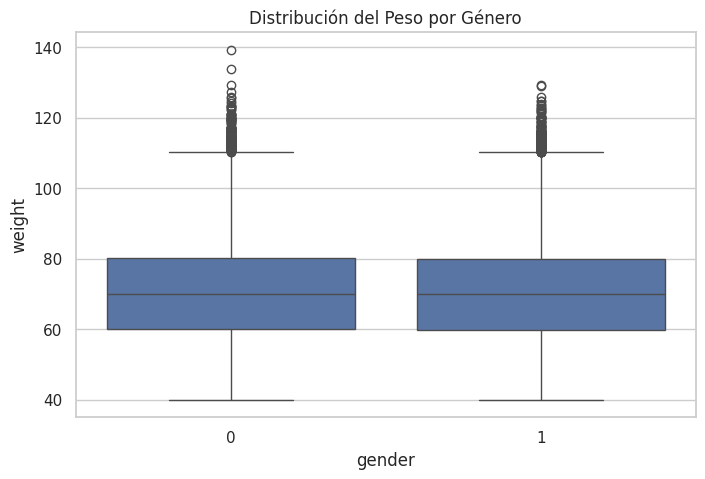

In [109]:
# Boxplot de Peso por Género
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='weight', data=df_health)
plt.title('Distribución del Peso por Género')
plt.show()

El grafico indica mayor peso en el genero masculino(0) o podrian ser datos mal cargados u outliers

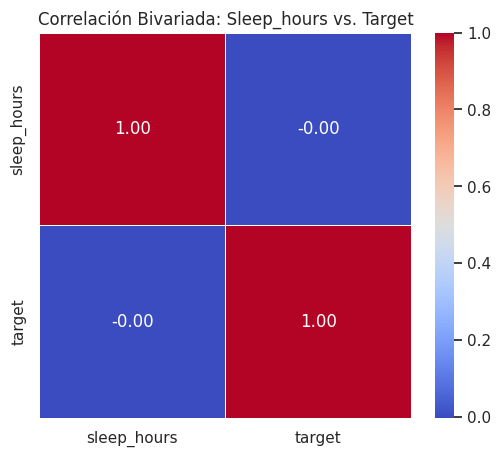

In [110]:
variables_bivariadas = ['sleep_hours', 'target']
df_bivariado = df_health[variables_bivariadas]

# --- Calcular la matriz de correlación bivariada ---
correlacion_bivariada = df_bivariado.corr()

# --- Crear el heatmap bivariado ---
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlacion_bivariada,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlación Bivariada: Sleep_hours vs. Target')
plt.show()


No hay correlacion entre la variable target y sleep_hours.

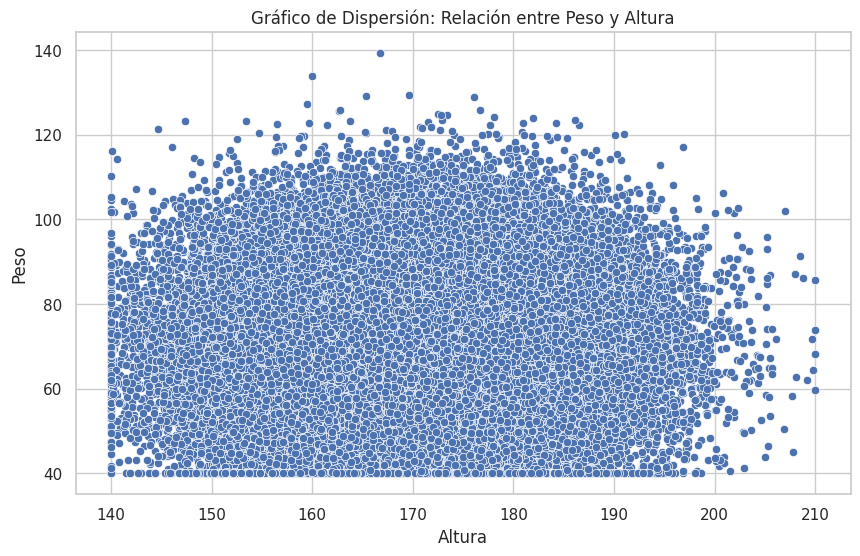

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_health,
    x='height',
    y='weight'
)
plt.title('Gráfico de Dispersión: Relación entre Peso y Altura')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.grid(True)
plt.show()

Relacion debil de peso y altura

Multivariado

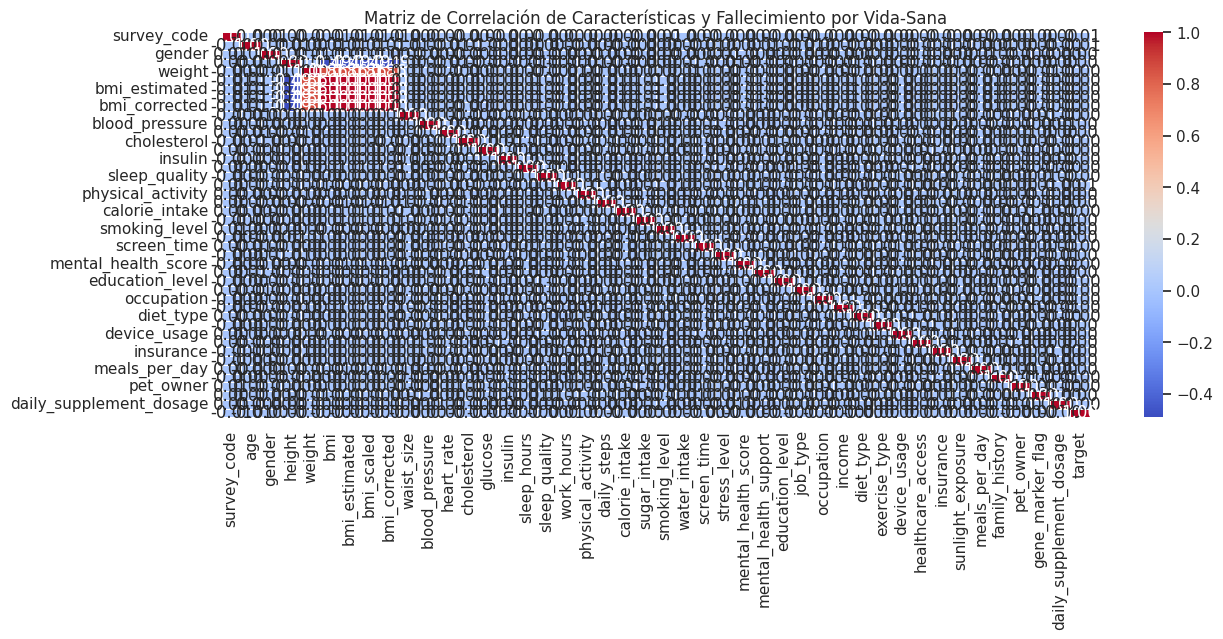

In [112]:
df_heatmap= df_health
correlacion_matriz = df_heatmap.corr()
plt.figure(figsize=(14, 5))
sns.heatmap(
    correlacion_matriz,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Matriz de Correlación de Características y Fallecimiento por Vida-Sana')
plt.show()

como no se entiende se saca el top de las variables

Variable 'target' codificada numéricamente.

Top 5 variables más correlacionadas con 'target':
work_hours           0.010906
daily_steps          0.004842
exercise_type        0.004325
gene_marker_flag     0.003855
healthcare_access    0.003740
Name: target, dtype: float64
--------------------------------------------------


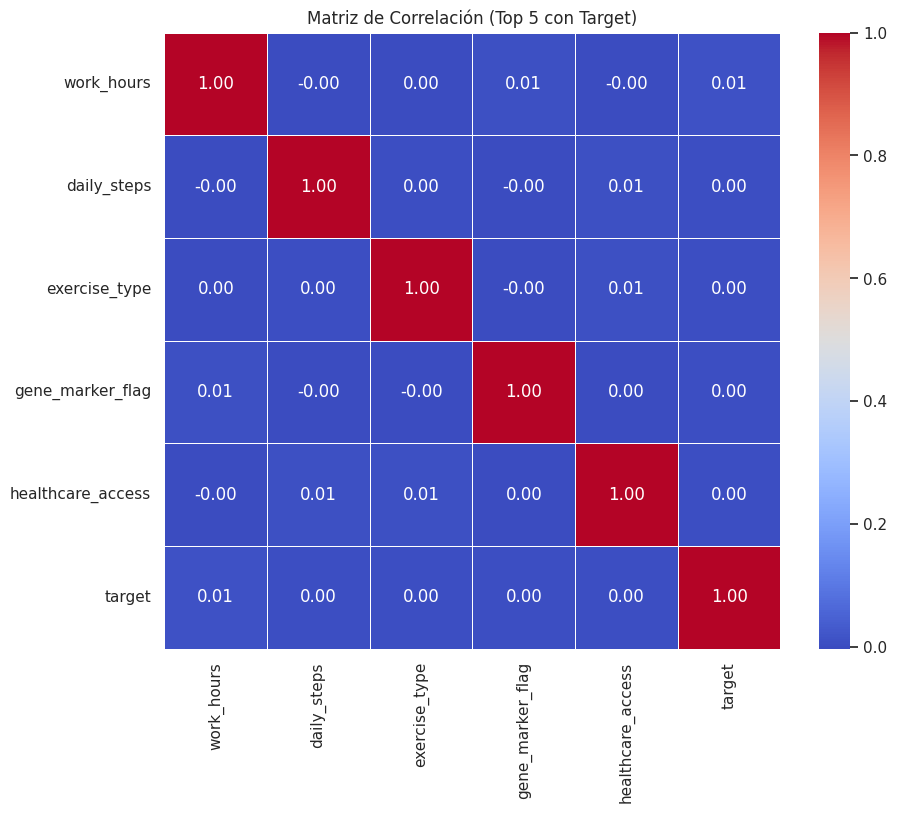

In [113]:
if 'target' in df_health.columns:
    le = LabelEncoder()
    df_health['target'] = le.fit_transform(df_health['target'])
    print("Variable 'target' codificada numéricamente.")
else:
    print("La columna 'target' no se encontró en el DataFrame.")
    exit()

# --- 1. Calcular la correlación ---
# Calcular la matriz de correlación con 'target'
correlacion_con_target = df_health.corr()['target'].sort_values(ascending=False)

# --- 2. Identificar el top 5 ---
# Excluir 'target' de la lista ya que su correlación consigo misma es 1.0.
# Usamos .iloc[1:6] para obtener las 5 primeras, excluyendo la primera posición (target).
top_5_variables = correlacion_con_target.iloc[1:6].index.tolist()

# Añadir la variable objetivo de vuelta a la lista para el heatmap
variables_para_heatmap = top_5_variables + ['target']

print(f"\nTop 5 variables más correlacionadas con 'target':")
print(correlacion_con_target.iloc[1:6])
print("-" * 50)

# --- 3. Filtrar el DataFrame y calcular la nueva matriz de correlación ---
df_top5 = df_health[variables_para_heatmap]
correlacion_matriz_top5 = df_top5.corr()

# --- 4. Generar el Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacion_matriz_top5,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    square=True
)
plt.title('Matriz de Correlación (Top 5 con Target)')
plt.show()

Variables que tienen mayor correlacion positiva con Target.

Variable 'target' codificada numéricamente.

Variables significativamente correlacionadas con 'target':
Series([], Name: target, dtype: float64)


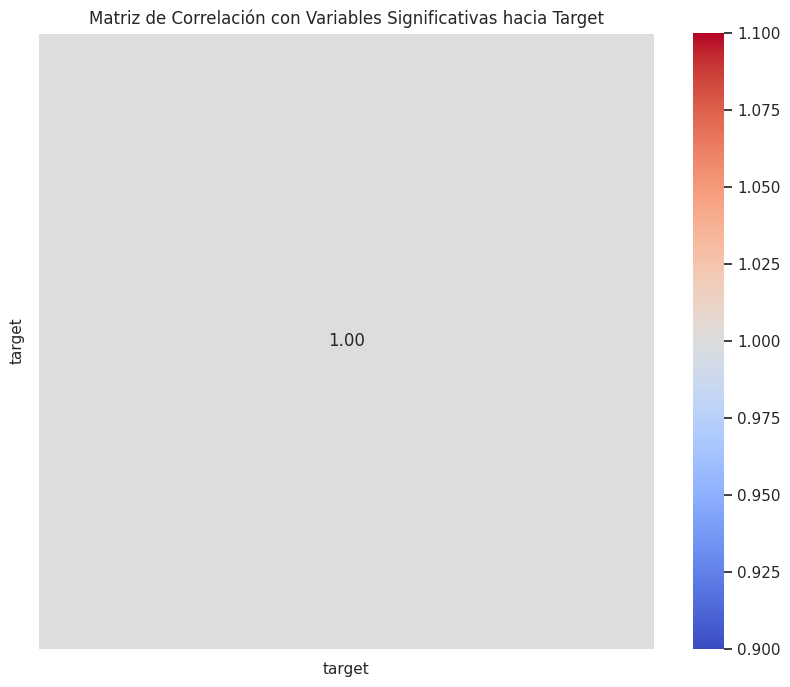

In [114]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# --- Codificar 'target' si existe ---
if 'target' in df_health.columns:
    le = LabelEncoder()
    df_health['target'] = le.fit_transform(df_health['target'])
    print("Variable 'target' codificada numéricamente.")
else:
    print("La columna 'target' no se encontró en el DataFrame.")
    exit()

# --- 1. Calcular la matriz de correlación ---
correlacion_con_target = df_health.corr()['target'].drop('target')

# --- 2. Filtrar variables con correlación significativa ---
# Tomamos las variables con correlación >= 0.1 o <= -0.1
variables_significativas = correlacion_con_target[correlacion_con_target.abs() >= 0.1]

# Ordenar por valor absoluto (de mayor a menor)
variables_significativas = variables_significativas.reindex(variables_significativas.abs().sort_values(ascending=False).index)

# Mostrar resultado
print("\nVariables significativamente correlacionadas con 'target':")
print(variables_significativas)

# --- 3. Preparar las variables para el heatmap ---
variables_para_heatmap = variables_significativas.index.tolist() + ['target']

# --- 4. Calcular matriz de correlación de esas variables ---
df_top = df_health[variables_para_heatmap]
correlacion_matriz_top = df_top.corr()

# --- 5. Generar el heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacion_matriz_top,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    square=True
)
plt.title('Matriz de Correlación con Variables Significativas hacia Target')
plt.show()


La variable target no tiene correlacion fuerte con ninguna variable solo consigo misma


In [115]:
if df_health['bmi'].dtype == 'object':
    le = LabelEncoder()
    df_health['bmi'] = le.fit_transform(df_health['bmi'])

# Calcular matriz de correlación
correlation_matrix = df_health.corr(numeric_only=True)

# Correlación de las variables con respecto a 'bmi'
cor_with_bmi = correlation_matrix['bmi'].drop('bmi')

# Filtrar correlaciones moderadas (entre 0.4 y 0.7 en valor absoluto)
cor_moderada = cor_with_bmi[cor_with_bmi.abs().between(0.4, 0.7)]

# Mostrar resultados ordenados
print("Variables con correlación moderada con 'bmi':")
print(cor_moderada.sort_values(ascending=False))

Variables con correlación moderada con 'bmi':
height   -0.490703
Name: bmi, dtype: float64


In [116]:
if df_health['bmi'].dtype == 'object':
    le = LabelEncoder()
    df_health['bmi'] = le.fit_transform(df_health['bmi'])

# Calcular matriz de correlación
correlation_matrix = df_health.corr(numeric_only=True)

# Correlación de las variables con respecto a 'bmi'
cor_with_bmi = correlation_matrix['bmi'].drop('bmi')

# Filtrar correlaciones alta (entre 0.7 y 1 en valor absoluto)
cor_moderada = cor_with_bmi[cor_with_bmi.abs().between(0.7, 1)]

# Mostrar resultados ordenados
print("Variables con correlación alta con 'bmi':")
print(cor_moderada.sort_values(ascending=False))

Variables con correlación alta con 'bmi':
bmi_estimated    1.000000
bmi_scaled       1.000000
bmi_corrected    0.999435
weight           0.864413
Name: bmi, dtype: float64


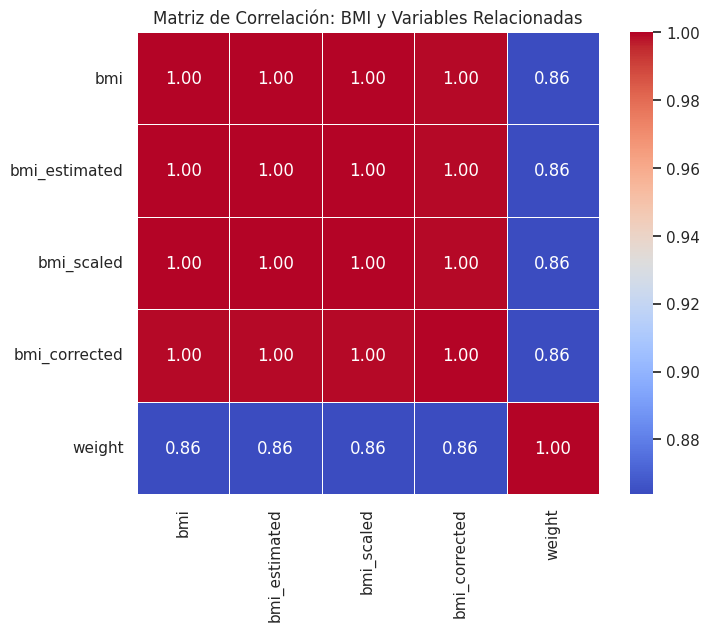

In [117]:
# Lista de variables a incluir en el heatmap
variables_heatmap = [
    'bmi',
    'bmi_estimated',
    'bmi_scaled',
    'bmi_corrected',
    'weight'
]

# Asegurarse de que las columnas existan en el DataFrame y convertirlas a numérico
# para el cálculo de correlación.
for col in variables_heatmap:
    if col in df_health.columns:
        df_health[col] = pd.to_numeric(df_health[col], errors='coerce')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró y será omitida.")

# --- Filtrar el DataFrame y calcular la matriz de correlación ---
df_filtrado = df_health[variables_heatmap].dropna()
correlacion_matriz = df_filtrado.corr()

# --- Generar el Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlacion_matriz,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    square=True
)
plt.title('Matriz de Correlación: BMI y Variables Relacionadas')
plt.show()


Este grafico indica la relacion del indice masa muscular y su correlacion con las variables que mas correlacion tienen.

In [118]:
print(df_health['target'].dtype)

int64


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_health['target_encoded'] = le.fit_transform(df_health['target'])

In [120]:
print(df_health['target'].dtype)

int64


In [121]:
correlacion_con_target = df_health.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
print(correlacion_con_target)

target                     1.000000
target_encoded             1.000000
work_hours                 0.010906
daily_steps                0.004842
exercise_type              0.004325
gene_marker_flag           0.003855
healthcare_access          0.003740
meals_per_day              0.002914
blood_pressure             0.002537
water_intake               0.001848
mental_health_support      0.001678
smoking_level              0.001578
height                     0.001453
physical_activity          0.001298
device_usage               0.001230
gender                     0.000916
insurance                  0.000904
stress_level               0.000767
sunlight_exposure          0.000419
sugar_intake               0.000398
heart_rate                 0.000050
pet_owner                 -0.000098
insulin                   -0.000124
family_history            -0.000133
screen_time               -0.000134
calorie_intake            -0.000254
income                    -0.000344
daily_supplement_dosage   -0

Conclusiones del EDA

Lo que determinan los graficos es que la variable objetiva de target no tiene una correlacion directa con las demas variables.  Por eso realice mas graficos con el indice de masa muscular que tiene realacion con el peso y una media correlacion con altura.